In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
from scipy import optimize

In [ ]:
#This document is intra-day analysis of the data

In [3]:
data = Table.read("ASTR19_F25_group_project_data.txt", format="ascii")
print(data)

#I believe column 3 is the highest high tide and the lowest low tide in each day. 
#There should be another max and another min each day but we don't have data points for those

col1  col2  col3
---- ----- -----
   1  8:07  6.57
   1 15:37 -0.39
   2  8:55  5.38
   2 16:25 -1.74
   3  9:45  5.26
   3 17:14 -1.36
   4 10:35  4.13
   4 18:00 -1.15
   5 11:28  3.48
   5 18:46 -1.61
 ...   ...   ...
  37  2:13  4.13
  37 20:00  1.21
  38  2:54  3.34
  38  9:54  2.58
  39  3:39  3.32
  39 11:15  3.26
  40  4:29  5.21
  40 12:22  2.39
  41  5:21  4.83
  41 13:14  2.41
Length = 82 rows


In [86]:
#Intra-day
#We'll need a table with 41 values per column

table2 = Table()
table2['high_time'] = [1.53333333333333, 2.21666666666667, 2.36666666666667, 2.9, 2.96666666666667, 3.36666666666667, 3.61666666666667, 3.65, 4.11666666666667, 4.38333333333333, 4.48333333333333, 4.83333333333333, 5.25, 5.35, 5.51666666666667, 6.13333333333333, 6.15, 6.78333333333333, 7.08333333333333, 7.36666666666667, 7.96666666666667, 7.98333333333333, 8.11666666666667, 8.56666666666667, 8.83333333333333, 8.91666666666667, 9.16666666666667, 9.66666666666667, 9.75, 9.75, 10.35, 10.5, 10.5833333333333, 10.95, 11.3166666666667, 11.4666666666667, 11.6333333333333, 12.1666666666667, 12.3666666666667, 12.4166666666667, 13.4]
table2['high_feet'] = [3.45, 4.13, 4.1, 3.34, 3.17, 3.57, 3.71, 3.32, 4.54, 4.04, 5.21, 3.76, 4.07, 4.83, 3.9, 4.73, 5.93, 5.66, 6.89, 5.33, 6.72, 5.23, 6.57, 6.67, 6.77, 5.38, 4.74, 5.77, 5.26, 4.69, 4.2, 4.35, 4.13, 3.68, 4.23, 3.48, 2.47, 2.24, 2.62, 2.59, 1.83]
#Array of the first tide measurement from each day

table3 = Table()
table3['low_time'] = [9.9, 10.7333333333333, 11.25, 11.9166666666667, 11.9666666666667, 12.3666666666667, 12.9333333333333, 12.95, 13.2333333333333, 13.75, 13.8333333333333, 14.4166666666667, 14.65, 15, 15.45, 15.5666666666667, 15.6166666666667, 16.1333333333333, 16.1666666666667, 16.4166666666667, 16.6833333333333, 16.8666666666667, 17.2, 17.2333333333333, 17.5666666666667, 17.75, 18, 18.2, 18.25, 18.7666666666667, 18.8, 18.8166666666667, 19.3333333333333, 19.4, 19.5166666666667, 19.8666666666667, 20, 20.2666666666667, 20.5, 21.0166666666667, 21.7666666666667]
table3['low_feet'] = [2.58, 3.1, 3.26, 2.49, 2.88, 2.39, 1.92, 2.18, 2.41, 1.74, 0.7, 0.79, 0.21, -0.04, 0.22, -1.12, -0.39, -0.61, -1.68, -1.74, -0.93, -1.32, -1.29, -1.36, -0.73, 0.22, -1.15, -0.38, 0.26, -1.61, 0.36, -0.61, 0.99, -0.46, 0.05, 1.87, 1.21, 1.01, 1.6, 0.73, 2.17]
#Array of the second tide measurement from each day

#In these the time values are ordered by time of day and the tide level values are in the same row as their corresponding time

-1.52514840422603 0.6079689155082503 -0.05157150621659241 4.651691147169564
2.182213827604058 0.4072804138725074 10.48532865711573 1.0101614183893082


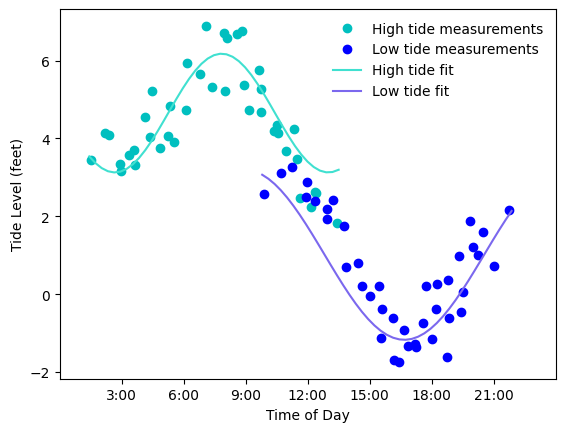

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

xhigh = table2['high_time']   #Time of day of high tides
yhigh = table2['high_feet']   #High tide values

xlow = table3['low_time']
ylow = table3['low_feet']

ax.plot(xhigh, yhigh, 'co', label='High tide measurements')
ax.plot(xlow, ylow, 'bo', label='Low tide measurements')

ax.set_xlim([0, 24])
xticks = np.linspace(3, 21, 7)
ax.set_xticks(xticks, labels=[(f'{x:.0f}:00') for x in xticks])
ax.set_xlabel('Time of Day')
ax.set_ylabel('Tide Level (feet)')



#Fit lines for high and low tide

x_highfit = np.linspace(1.43, 13.5, 41)

def f_line(x_highfit, a, b, c, d):
    return a * np.sin(b*x_highfit + c) + d
#perform fit
params, params_cov = optimize.curve_fit(f_line, x_highfit, yhigh, sigma=0.25, p0=[2, 0.31, 3, 4.5])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
print(a_fit, b_fit, c_fit, d_fit)
high_fit = a_fit * np.sin(b_fit * x_highfit + c_fit) + d_fit
ax.plot(x_highfit, high_fit, color='turquoise', label='High tide fit')



x_lowfit = np.linspace(9.8, 21.87, 41)

def f_line(x_lowfit, a, b, c, d):
    return a * np.sin(b*x_lowfit + c) + d
#perform fit
params, params_cov = optimize.curve_fit(f_line, x_lowfit, ylow, sigma=0.25, p0=[2, 0.31, 12, 1])
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
print(a_fit, b_fit, c_fit, d_fit)
low_fit = a_fit * np.sin(b_fit * x_lowfit + c_fit) + d_fit
ax.plot(x_lowfit, low_fit, color='mediumslateblue', label='Low tide fit')


ax.legend(loc=0, frameon=False)

In [ ]:
#The high and low tides are more extreme in the middle of the time range they appear during
#The highest high tides appear when high tide is ~8:00
#The lowest low tides appear when low tide is ~16

In [ ]:
#Average values for high and low tide
meanhigh = np.mean(table2['high_feet'])
meanlow = np.mean(table3['low_feet'])

x = np.linspace(0, 24, 100)
ymeanhigh = np.full(100, meanhigh)
ymeanlow = np.full(100, meanlow)

ax.plot(x, ymeanhigh, 'c-', alpha=0.5, label='Mean high tide')
ax.plot(x, ymeanlow, 'b-', alpha=0.5, label='Mean low tide')

ax.legend(loc=0, frameon=False)

(-2.0, 8.0)

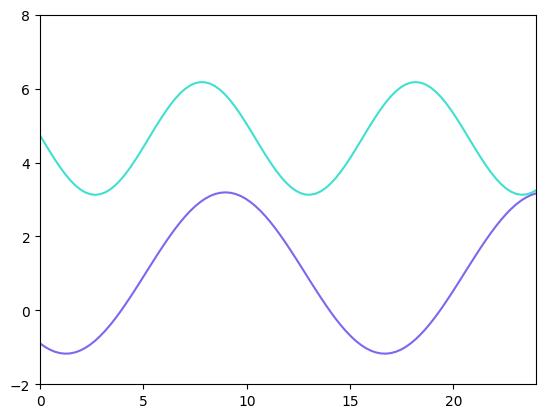

In [89]:
#From these fit lines we can predict to an extent what the other maximum and minumum will be

x = np.linspace(0, 24, 100)
highfit_full = -1.5251 * np.sin(0.6080*x + -0.0516) + 4.6517
lowfit_full = 2.1822 * np.sin(0.4073*x + 10.4853) + 1.0102

plt.plot(x, highfit_full, color='turquoise')
plt.plot(x, lowfit_full, color='mediumslateblue')

plt.xlim([0, 24])
plt.ylim([-2, 8])

In [ ]:
# ^ How the high and low tides vary depending on what time of day they occur at
#The right side of the high tide line realistically won't be as pronounced as the left side b/c it'll be a smaller maxiumun
#Same with the left side of the low tide line
#Of course this is all assuming the data values are daily max and min, which I still have to confirm
#But I think they are because the first of each day's 2 data points is always higher than the 2nd
#and they're measured at nonuniform times which suggests significance in when the data was collected, which I presume is max and min tide